# Table of contents

- Importing libraries
- Question 6: creating visualizations for the customer profiles
    - Are there products more popular than others?
    - What’s the distribution among users in regards to their brand loyalty
    - Are there differences in ordering habits based on a customer’s loyalty status? 
    - Are there differences in ordering habits based on a customer’s region? 
    - Compare your customer profiles with regions and departments. 

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\alexa\OneDrive\Documents\data analytics\Achievement 4\01-09-2022 Instacart Basket Analysis'

In [3]:
df_total = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Final_cust_profile.pkl'))

# Question 6: creating visualizations for the customer profiles

In [4]:
df_total.head()

,order_id,user_id,order_number,Order_day_of_week,order_hour_of_day,Days since last order,New customer,product_id,add_to_cart_order,reordered,...,income,Region,total_orders,activity_flag,age_group,dependent_flag,department,income_flag,Has_pets,Has_baby
0,2539329,1,1,2,8,NaN,True,196.0,1.0,0.0,...,40423,South,59,Regular_activity,Adult,Parent,beverages,low income,no,no
1,2398795,1,2,3,7,15.0,False,196.0,1.0,1.0,...,40423,South,59,Regular_activity,Adult,Parent,beverages,low income,no,no
2,473747,1,3,3,12,21.0,False,196.0,1.0,1.0,...,40423,South,59,Regular_activity,Adult,Parent,beverages,low income,no,no
3,2254736,1,4,4,7,29.0,False,196.0,1.0,1.0,...,40423,South,59,Regular_activity,Adult,Parent,beverages,low income,no,no
4,431534,1,5,4,15,28.0,False,196.0,1.0,1.0,...,40423,South,59,Regular_activity,Adult,Parent,beverages,low income,no,no


In [5]:
df_total.columns

Index(['order_id', 'user_id', 'order_number', 'Order_day_of_week',
       'order_hour_of_day', 'Days since last order', 'New customer',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', '_merge', 'price_range_loc',
       'Busiest day', '2 busy/slow days', 'busiest_period_of_day', 'max order',
       'loyalty_flag', 'Mean_price', 'Spend_flag', 'Median_since_last_ordered',
       'Order_frequency_flag', 'Gender', 'State', 'Age', 'Date joined',
       'No of dependents', 'Marital status', 'income', 'Region',
       'total_orders', 'activity_flag', 'age_group', 'dependent_flag',
       'department', 'income_flag', 'Has_pets', 'Has_baby'],
      dtype='object')

# Are there products more popular than others?

In [6]:
df_total['department'].value_counts(dropna=False)

produce            9109507
dairy eggs         5188656
snacks             2774135
beverages          2582147
frozen             2150710
pantry             1802447
bakery             1127577
canned goods       1026965
deli               1010388
dry goods pasta     833013
household           709970
meat seafood        681740
breakfast           676141
personal care       430565
babies              407558
international       258750
alcohol             147510
pets                 94036
missing              66678
other                34945
bulk                 33338
Name: department, dtype: int64

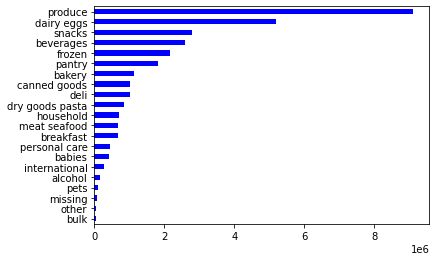

In [7]:
#create bar chart on popular products
bar_depart_orders=df_total['department'].value_counts(dropna=False).sort_values(ascending=True).plot.barh(color=['blue'])

In [8]:
bar_depart_orders.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_depart_orders.final.png'))

# What’s the distribution among users in regards to their brand loyalty

In [9]:
# create a pie chart on the 'loyalty_flag' to demonstrate brand loyalty
df_loyalty=df_total[['loyalty_flag', 'user_id']]
df_loyalty_unique=df_loyalty.drop_duplicates()

In [10]:
df_loyalty_unique['loyalty_flag'].value_counts()

New customer        107931
Regular customer     73858
Loyal customer       16334
Name: loyalty_flag, dtype: int64

(-1.1115149482990572,
 1.11753674857566,
 -1.1106952390482736,
 1.1005092970975368)

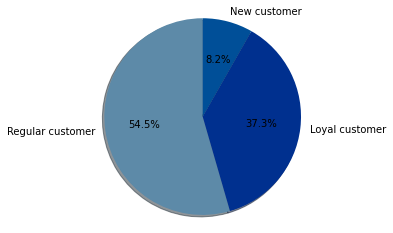

In [11]:
labels = 'Regular customer', 'Loyal customer', 'New customer'
sizes = df_loyalty_unique['loyalty_flag'].value_counts()
colors = ['#5D8AA8', '#00308F', '#004F98']
textprops = {}

loyal, ax = plt.subplots()
ax.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',
        shadow=True, startangle=90,textprops=textprops)
ax.axis('equal')  


In [12]:
loyal.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyal_piechart.final.png'))

# Are there differences in ordering habits based on a customer’s loyalty status? 

In [13]:
df_total.groupby('loyalty_flag').agg({'prices': ['mean', 'max', 'min']})

prices           
                      mean   max  min
loyalty_flag                         
Loyal customer    7.773852  25.0  1.0
New customer      7.801210  25.0  1.0
Regular customer  7.798387  25.0  1.0

In [14]:
df_total.groupby('loyalty_flag').agg({'Median_since_last_ordered': ['mean', 'max', 'min']})

Median_since_last_ordered           
                                      mean   max  min
loyalty_flag                                         
Loyal customer                    5.168256  14.0  0.0
New customer                     18.465342  30.0  0.0
Regular customer                 10.609949  30.0  0.0

In [15]:
#measuring loyalty on the spend_flag
df_loyalty2=pd.crosstab(df_total['price_range_loc'], df_loyalty_unique['loyalty_flag'], normalize='index')
df_loyalty2=df_loyalty2.reindex(['New customer', 'Regular customer', 'Loyal customer'], axis='columns')
df_loyalty2_labels=pd.crosstab(index=df_total['price_range_loc'], columns=df_loyalty_unique['loyalty_flag'])
df_loyalty2_labels=df_loyalty2_labels.reindex(['New customer', 'Regular customer', 'Loyal customer'], axis='columns')
df_loyalty2_labels

loyalty_flag,New customer,Regular customer,Loyal customer
price_range_loc,,,
High-range products,33,9,0
Low range products,35763,23657,4711
Mid range products,4416,4200,1137


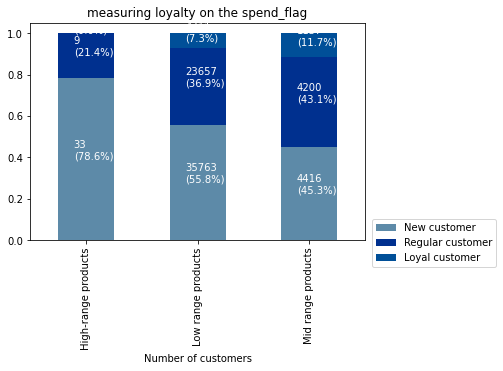

In [44]:
bar_loyalty2=df_loyalty2.plot.bar(stacked=True,color=['#5D8AA8', '#00308F', '#004F98'])
plt.title('measuring loyalty on the spend_flag')
plt.xlabel('Number of customers')
plt.legend(bbox_to_anchor=(1.02, 0.1), loc='upper left', borderaxespad=0)
for n, y in enumerate([*df_loyalty2.index.values]):
    for (proportion, count, x_loc) in zip(df_loyalty2.loc[y],
                                     df_loyalty2_labels.loc[y],
                                        df_loyalty2.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="white")

In [45]:
bar_loyalty2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_spend.final.png'))

In [18]:
#measuring Loyalty_flag by income_flag
income_loyalty=pd.crosstab(df_total['loyalty_flag'], df_total['income_flag'])
income_loyalty

income_flag,Middle class,low income,upper class
loyalty_flag,,,
Loyal customer,7861385,1073971,937078
New customer,4620139,880752,500770
Regular customer,12092723,1770668,1409290


# Are there differences in ordering habits based on a customer’s region? 

In [19]:
# which region has more customers?
df_total[['Region', 'user_id']].groupby('Region').agg({'user_id': pd.Series.nunique,}).sort_values(by='user_id',ascending=False)

,user_id
Region,
South,68737
West,52565
Midwest,48519
Northeast,28302


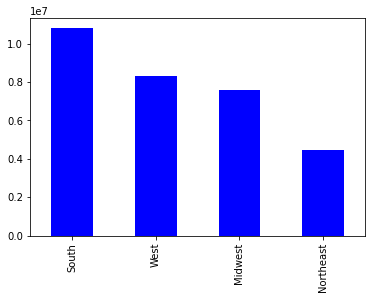

In [20]:
#creating a bar chart based on regional customer counts
region_bar=df_total['Region'].value_counts().plot.bar(color='blue')

In [21]:
region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_bar.final.png'))

In [22]:
# Please note that the South also has the most states 
df_total[['Region', 'State']].groupby('Region').agg({'State': pd.Series.nunique,}).sort_values(by='State',
                                                                                          ascending=False)

,State
Region,
South,17
West,13
Midwest,12
Northeast,7


In [23]:
# Which region spends the most?
df_total[['prices', 'Region']].groupby('Region').agg('sum').sort_values(by ='prices', ascending=False)

,prices
Region,
South,84107910.4
West,64595126.7
Midwest,59192977.7
Northeast,34734646.7


In [24]:
# comparing region vs spend_flag
cross = pd.crosstab(df_total['Region'], df_total['Spend_flag'], dropna=False).sort_index()
cross

Spend_flag,High spender,Low spender
Region,,
Midwest,155975,7441350
Northeast,85088,4379565
South,209691,10582194
West,160354,8132559


In [25]:
#creating a stacked bar chart to measure income between the regions

income_region = pd.crosstab(index=df_total['Region'], columns=df_total['income_flag'], normalize="index")

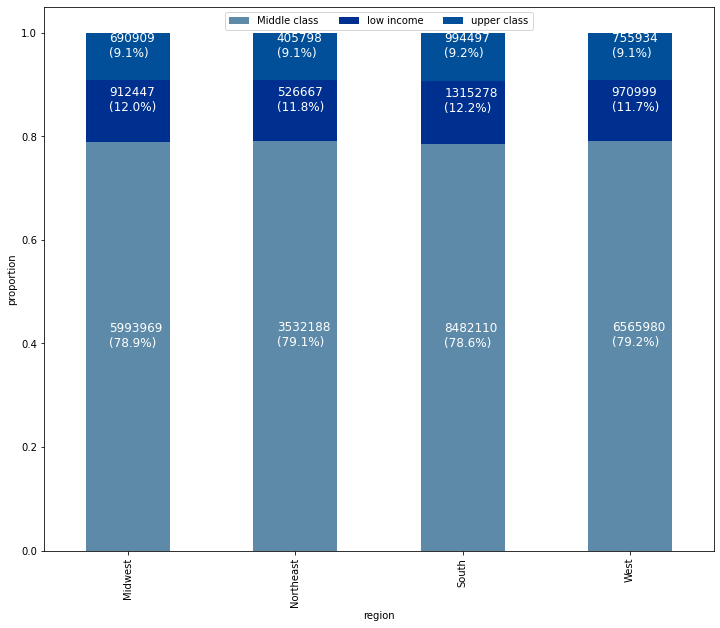

In [46]:
#creating cross tab to display labels

income_region_labels = pd.crosstab(index=df_total['Region'],columns=df_total['income_flag'])
#plotting chart
income_region_dist=income_region.plot(kind='bar', 
                        stacked=True, 
                        color=['#5D8AA8', '#00308F', '#004F98'], 
                        figsize=(12,10))

plt.legend(loc="upper center", ncol=4)
plt.ylabel("proportion")
plt.xlabel("region")


for n, y in enumerate([*income_region_labels.index.values]):
    for (proportion, count, x_loc) in zip(income_region.loc[y],
                                         income_region_labels.loc[y],
                                          income_region.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="white",
                 fontsize=12)

plt.show()

In [47]:
income_region_dist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_region_distincome.final.png'))

In [28]:
# measuring order frequency by region
cross2 = pd.crosstab(df_total['Region'], df_total['Order_frequency_flag'], dropna=False).sort_index()
cross2

Order_frequency_flag,Frequent cust,Non-frequent cust,Regular cust
Region,,,
Midwest,5017709,863419,1716197
Northeast,2970065,491986,1002602
South,7192372,1215088,2384420
West,5545206,927748,1819959


In [29]:
# measuring customer loyalty by region
cross3 = pd.crosstab(df_total['Region'], df_total['loyalty_flag'], dropna=False).sort_index()
cross3

loyalty_flag,Loyal customer,New customer,Regular customer
Region,,,
Midwest,2373774,1472573,3750978
Northeast,1430126,857878,2176649
South,3405844,2074410,5311631
West,2662690,1596800,4033423


# Is there a connection between age and family status in terms of ordering habits?

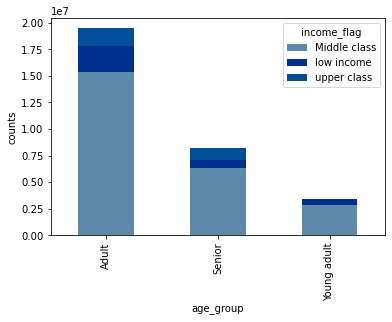

In [48]:
# creating a stacked bar chart to measure age vs income
bar_age_income=df_total.groupby('age_group')['income_flag'].value_counts().unstack().plot.bar(stacked=True,
                                                    ylabel='counts',color=['#5D8AA8', '#00308F', '#004F98'])

In [49]:
bar_age_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_income.final.png'))

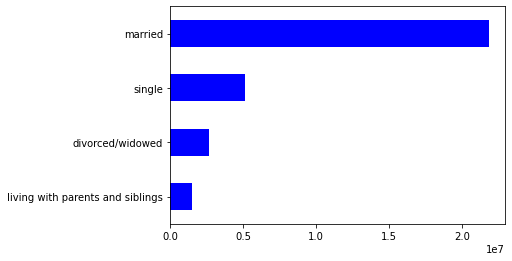

In [32]:
#bar chart measuring marital status
bar_marital=df_total['Marital status'].value_counts().sort_values().plot.barh(color='blue')

In [33]:
bar_marital.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_marital.final.png'))

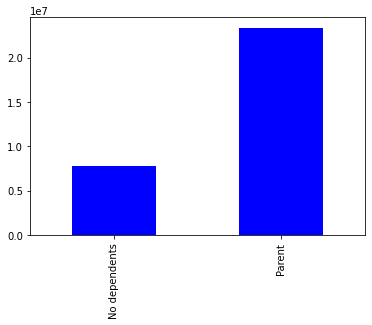

In [34]:
#bar chart measuring number of dependents
bar_dependent=df_total['dependent_flag'].value_counts().sort_values().plot.bar(color='blue')

In [35]:
bar_dependent.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dependent.png'))

In [36]:
#chart measuring which type age of customers shop when
age_order_time=pd.crosstab(df_total['order_hour_of_day'], df_total['age_group'])
age_order_time=age_order_time.reindex(['Young adult', 'Adult', 'Senior'], axis="columns")
age_order_time

age_group,Young adult,Adult,Senior
order_hour_of_day,,,
0,24153,131898,54128
1,13145,69259,28631
2,8371,40895,17517
3,5399,30596,13322
4,6419,31189,13706
5,10041,51515,23015
6,33843,170783,74337
7,94331,531170,229281
8,180267,1033375,437219


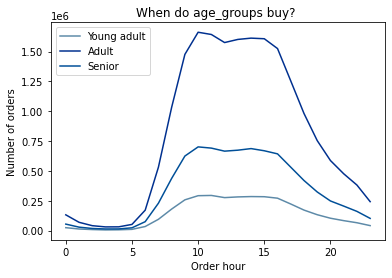

In [37]:
#Line chart measyring of orders by age groups
line_age_order_time=age_order_time.plot(kind='line', color=['#5D8AA8', '#00308F', '#004F98'])
plt.title('When do age_groups buy? ')
plt.xlabel('Order hour')
plt.ylabel('Number of orders')
plt.legend()

In [38]:
line_age_order_time.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_order_time.png'))

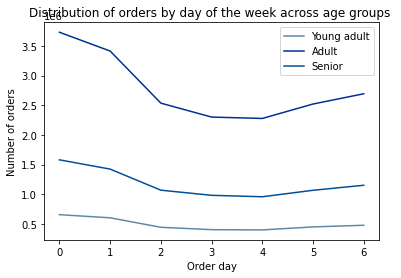

In [39]:
#Line chart measuring the number of orders during a certain day for eage age group
age_order_day=pd.crosstab(df_total['Order_day_of_week'], df_total['age_group'])
age_order_day=age_order_day.reindex(['Young adult', 'Adult', 'Senior'], axis="columns")
age_order_day

line_age_order_day=age_order_day.plot(kind='line', color=['#5D8AA8', '#00308F', '#004F98'])
plt.title('Distribution of orders by day of the week across age groups ')
plt.xlabel('Order day')
plt.ylabel('Number of orders')
plt.legend()

In [40]:
line_age_order_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_order_day.png'))